# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [19]:
weather_api_key = 'aed18c4935b915fd96fedc0ee890ab7e'

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | bayji
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | kushima
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | oktyabrskoye
Processing Record 14 of Set 1 | urengoy
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | grahamstown
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | leh
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | gold coast
Processing Record 21 of Set 1 | palabuhanratu
City not found. S

Processing Record 38 of Set 4 | sharjah
Processing Record 39 of Set 4 | ovalle
Processing Record 40 of Set 4 | pucallpa
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | beeville
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | grand gaube
Processing Record 45 of Set 4 | bafoulabe
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | amga
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 0 of Set 5 | salina cruz
Processing Record 1 of Set 5 | weligama
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | baykit
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | karaul
City not found. Skipping...
Processing Record 8 of Set 5 | raudeberg
Processing Recor

Processing Record 29 of Set 8 | saint-leu
Processing Record 30 of Set 8 | baoding
Processing Record 31 of Set 8 | imbituba
Processing Record 32 of Set 8 | masindi
Processing Record 33 of Set 8 | poronaysk
Processing Record 34 of Set 8 | intipuca
Processing Record 35 of Set 8 | macaubas
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | la serena
Processing Record 38 of Set 8 | ekhabi
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | ponta delgada
Processing Record 42 of Set 8 | chapayevka
Processing Record 43 of Set 8 | kjollefjord
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | agboville
Processing Record 46 of Set 8 | ayagoz
Processing Record 47 of Set 8 | gorele
Processing Record 48 of Set 8 | uyuni
Processing Record 49 of Set 8 | hailar
Processing Record 0 of Set 9 | luwuk
Processing Record 1 of Set 9 | sinjar
Processing Record 2 of Set 9 | ilulissat
Processing Record 3 o

Processing Record 20 of Set 12 | mao
Processing Record 21 of Set 12 | port lincoln
Processing Record 22 of Set 12 | abu zabad
Processing Record 23 of Set 12 | yulara
Processing Record 24 of Set 12 | aswan
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | chongoyape
Processing Record 27 of Set 12 | kankavli
City not found. Skipping...
Processing Record 28 of Set 12 | shenzhen
Processing Record 29 of Set 12 | serebryansk
Processing Record 30 of Set 12 | makakilo city
Processing Record 31 of Set 12 | murchison
Processing Record 32 of Set 12 | olafsvik
Processing Record 33 of Set 12 | simpang
Processing Record 34 of Set 12 | lovozero
Processing Record 35 of Set 12 | zhaotong
Processing Record 36 of Set 12 | almaznyy
Processing Record 37 of Set 12 | brus laguna
Processing Record 38 of Set 12 | otjiwarongo
Processing Record 39 of Set 12 | sawakin
Processing Record 40 of Set 12 | amberley
Processing Record 41 of Set 12 | san jose de ocoa
Processing Record 42 of Set 12 | l

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.2820,-126.8329,267.75,73,98,0.26,CA,1680477038
1,bayji,34.9311,43.4870,289.28,42,100,2.72,IQ,1680477039
2,usinsk,65.9939,57.5281,262.25,93,56,3.97,RU,1680476840
3,east london,-33.0153,27.9116,294.73,77,100,3.76,ZA,1680477039
4,kushima,31.4583,131.2333,289.85,72,19,5.34,JP,1680477040


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,267.75,73,98,0.26,CA,1680477038
1,bayji,34.9311,43.4870,289.28,42,100,2.72,IQ,1680477039
2,usinsk,65.9939,57.5281,262.25,93,56,3.97,RU,1680476840
3,east london,-33.0153,27.9116,294.73,77,100,3.76,ZA,1680477039
4,kushima,31.4583,131.2333,289.85,72,19,5.34,JP,1680477040


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

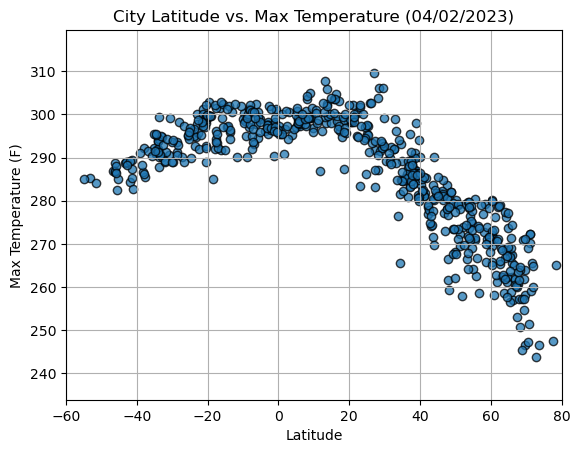

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60, 80)
plt.ylim(min(city_data_df["Max Temp"])-10, max(city_data_df["Max Temp"])+10)
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

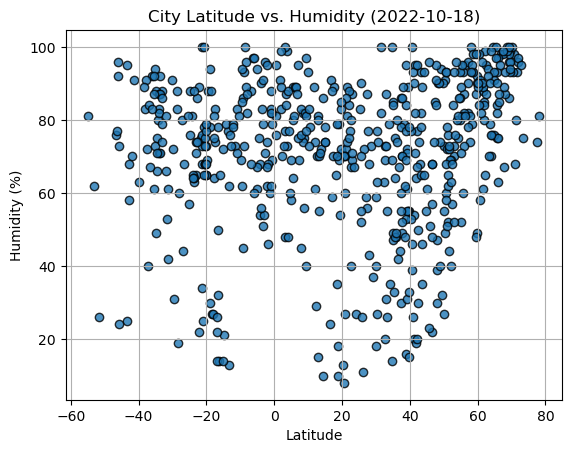

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

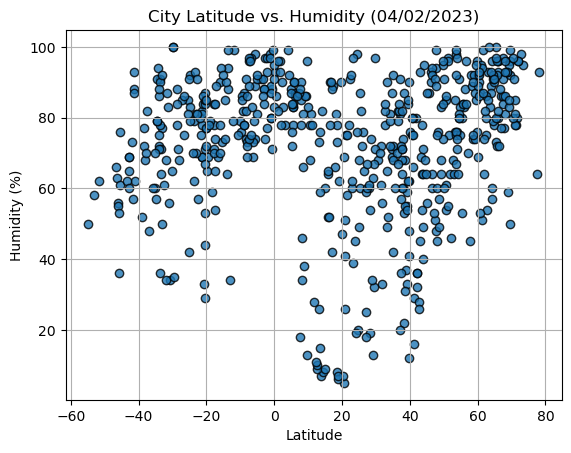

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


plt.title(f"City Latitude vs. Humidity (04/02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

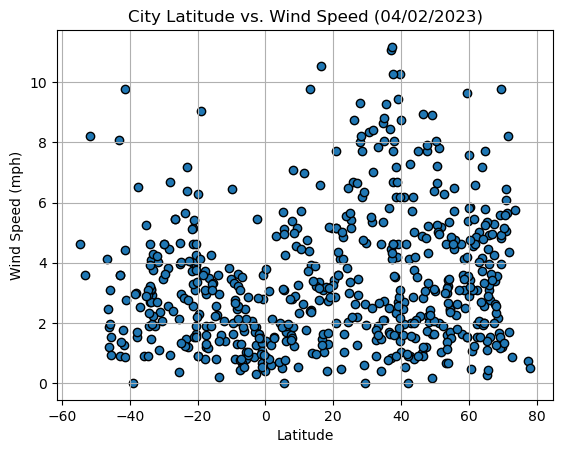

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

plt.title("City Latitude vs. Wind Speed (04/02/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    # Add x label, y label, and title
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)

    # Print r-value
    print(f"The r-value is: {r_value}")

    # Show plot
    plt.show()







In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,267.75,73,98,0.26,CA,1680477038
1,bayji,34.9311,43.4870,289.28,42,100,2.72,IQ,1680477039
2,usinsk,65.9939,57.5281,262.25,93,56,3.97,RU,1680476840
4,kushima,31.4583,131.2333,289.85,72,19,5.34,JP,1680477040
5,kapaa,22.0752,-159.3190,300.33,78,20,4.12,US,1680477040


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,east london,-33.0153,27.9116,294.73,77,100,3.76,ZA,1680477039
6,busselton,-33.6500,115.3333,287.91,91,1,4.09,AU,1680477041
9,port elizabeth,-33.9180,25.5701,293.88,72,100,2.68,ZA,1680477042
10,castro,-24.7911,-50.0119,289.90,92,60,2.97,BR,1680477042
13,grahamstown,-33.3042,26.5328,290.90,71,100,2.91,ZA,1680477043


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8980804123906004


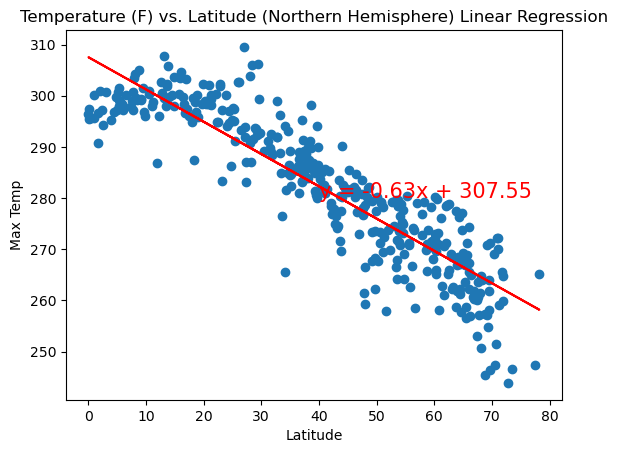

In [70]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Temperature (F) vs. Latitude (Northern Hemisphere) Linear Regression", 
                       "Max Temp", (40, 280))

The r-value is: 0.7113031247888404


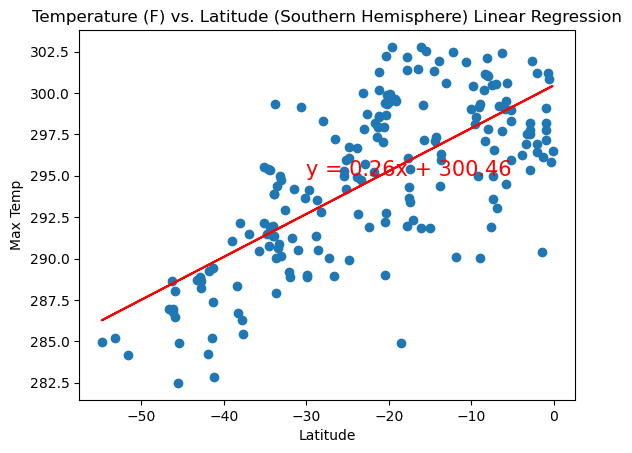

In [71]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Temperature (F) vs. Latitude (Southern Hemisphere) Linear Regression", 
                       "Max Temp", (-30,295))

**Discussion about the linear relationship: Based on the plots we can see a trend of increasing temperature as you approach the equator (latitude of zero). In the northern hemisphere we have an R value of -.89 indicating a strong negative correlation, and in the southern hemisphere we have an R value of .71 indicating a strong posistive correlation. All of this supports the claim that temperature increases as you approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2927411786970306


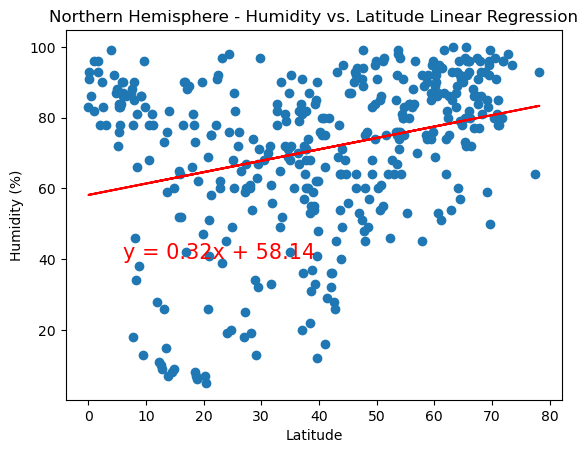

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, 
                        'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 
                        'Humidity (%)', (6,40))

The r-value is: 0.4397232758426855


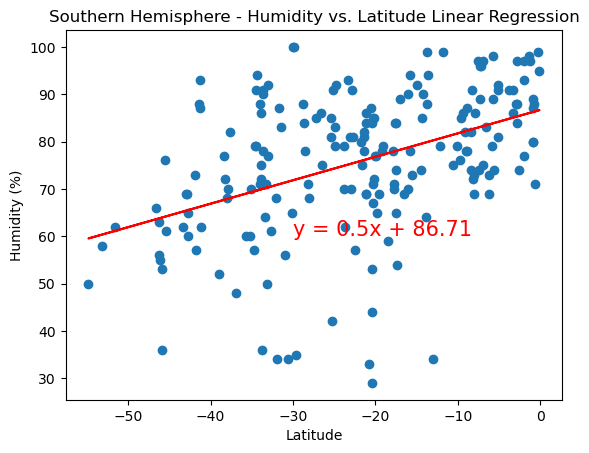

In [73]:
# Southern Hemisphere
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression", 
                       "Humidity (%)", (-30,60))

**Discussion about the linear relationship: Humidity does not seem to rely as heavily on position to the euqator and has a larger spread of data. For the northern hemisphere our R value is .29, which is closer to 0, indicating there is not a very strong correlation between latitude and humidity. Southern hemishpere does have a slighlty stronger correlation with an R value of .43, but we would need more data to determine if this is corrlated to latitude or if other factors affect this.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13913927720480498


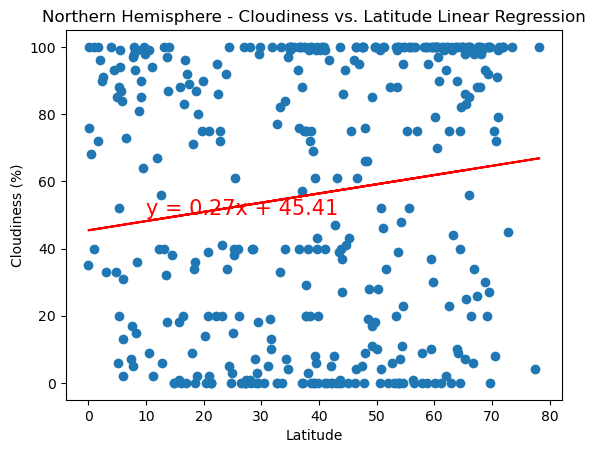

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Cloudiness (%)", (10, 50))

The r-value is: 0.37602240612749527


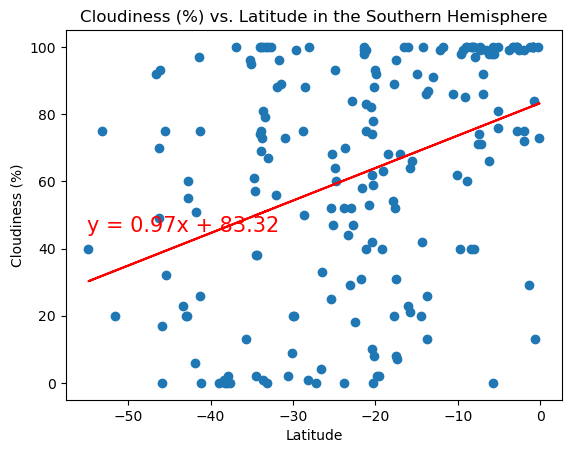

In [75]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to create the scatter plot
plot_linear_regression(x_values, y_values, 
                       'Cloudiness (%) vs. Latitude in the Southern Hemisphere', 
                       'Cloudiness (%)', (-55, 45))

**Discussion about the linear relationship: Cloudiness has no strong correlation in both the southern and nothern hemispheres as both R values are closer to zero. Plotting cloudiness vs. Other factors would be ideal to determine what affaects the amount of cloudiness in each hemisphere (Ex: cloudiness vs. humidity).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05644018632906795


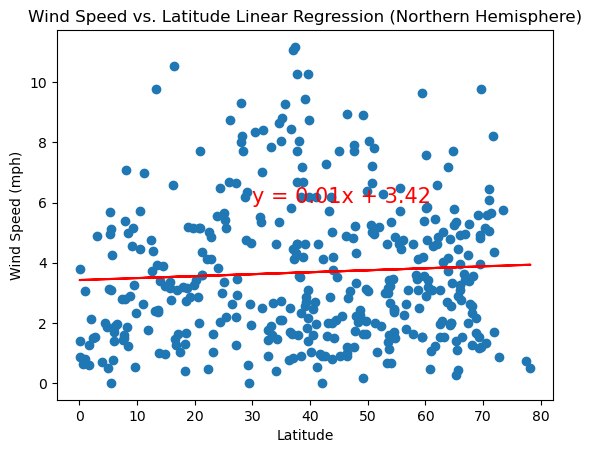

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to create the linear regression plot
plot_linear_regression(x_values, y_values, 
                       'Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)', 
                       'Wind Speed (mph)', (30,6))

The r-value is: -0.2839695181155094


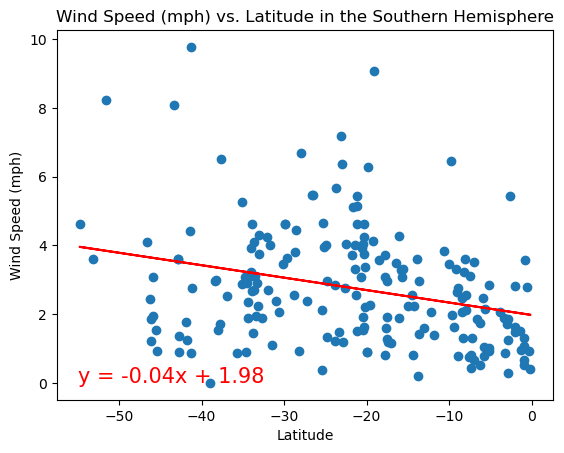

In [77]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed (mph) vs. Latitude in the Southern Hemisphere", "Wind Speed (mph)",
                       (-55, 0))

**Discussion about the linear relationship: Wind speed in the northern hemisphere has almost a 0 R-value showing that there is almost no correlation between wind speed and latitude. Southern Hemisphere also has a low R value but we should plot wind speed Vs other factors as well to try and find stronger correlations. Drawing conclusions from this data would be insignificant due to the low R-values.